# Лабораторна робота №4 з Видобування даних
## Тема роботи: Моделювання.
### Мета роботи: навчитися базовому фунукціоналу бібліотеки sckit learn для тренування моделей.

### Туторіали по темі:
- [лінійна регресія](https://scikit-learn.org/stable/modules/linear_model.html);
- [дерева рішень](https://scikit-learn.org/stable/modules/tree.html) для регресії;
- [k-nearest neighbours](https://scikit-learn.org/stable/modules/neighbors.html) для класифікації;
- [k-means](https://scikit-learn.org/stable/modules/clustering.html) для кластеризації.

### 1.Завантажте набір даних у колаб, і у data frame

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa_dataset_cleaned.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,short_name,value_eur,player_position,age,height_cm,weight_kg,overall,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,54000000.0,RW,35,169,67,91,81.0,89.0,90.0,94.0,34.0,64.0
1,K. Benzema,64000000.0,CF,34,185,81,91,80.0,88.0,83.0,87.0,39.0,78.0
2,R. Lewandowski,84000000.0,ST,33,185,81,91,75.0,91.0,79.0,86.0,44.0,83.0
3,K. De Bruyne,107500000.0,CM,31,181,70,91,74.0,88.0,93.0,87.0,64.0,77.0
4,Cristiano Ronaldo,41000000.0,ST,37,187,83,90,81.0,92.0,78.0,85.0,34.0,75.0


### 2. Використатйте метод train_test_split для того щоб отримати набір для тренування і тестування моделі

In [ ]:
from sklearn.model_selection import train_test_split

df_model = df.copy()

target_reg = "value_eur"
target_clf = "player_position"

feature_cols = [
    "age", "height_cm", "weight_kg",
    "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"
]

df_model = df_model.dropna(subset=feature_cols + [target_reg, target_clf])

X = df_model[feature_cols]
y_reg = df_model[target_reg]
y_clf = df_model[target_clf]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(
    f"Regression → total: {len(df_model)}, "
    f"train: {len(X_train_reg)}, "
    f"test: {len(X_test_reg)}"
)

print(
    f"Classification (14 classes) → total: {len(df_model)}, "
    f"train: {len(X_train_14)}, "
    f"test: {len(X_test_14)}"
)

Regression → total: 16394, train: 13115, test: 3279
Classification (14 classes) → total: 16394, train: 13115, test: 3279


### 3.Оберіть дві з трьох задач* (регресія, класифікація, кластеризація), які би хотіли викорситати для ваших даних. Наведіть приклади, що б ви хотіли за допомогою них отримати та аргументуйте свій вибір.
*Не конкретний алгоритм, а застосування задачі в межах вашого набору даних.


In [ ]:
text_task = """
Обрано дві задачі машинного навчання: регресія та класифікація.

1) Регресія:
Мета – прогнозувати ринкову вартість гравця (value_eur) за набором його характеристик (overall, pace, passing тощо).
Це дає змогу оцінювати вартість гравців, порівнювати їх між собою та робити попередні висновки про "переплату" або "недооцінку".

2) Класифікація:
Мета – передбачити основну позицію гравця (player_position) за його статистиками.
Це корисно для автоматичного визначення ролі гравця у команді, підбору позиції або перевірки, чи узгоджуються характеристики гравця з позицією.

Кластеризацію не обрано, оскільки в наборі даних вже присутні природні мітки (позиції), і задачі з учителем мають більш прямий практичний зміст.
"""
print(text_task)


Обрано дві задачі машинного навчання: регресія та класифікація.

1) Регресія:
Мета – прогнозувати ринкову вартість гравця (value_eur) за набором його характеристик (overall, pace, passing тощо).
Це дає змогу оцінювати вартість гравців, порівнювати їх між собою та робити попередні висновки про "переплату" або "недооцінку".

2) Класифікація:
Мета – передбачити основну позицію гравця (player_position) за його статистиками.
Це корисно для автоматичного визначення ролі гравця у команді, підбору позиції або перевірки, чи узгоджуються характеристики гравця з позицією.

Кластеризацію не обрано, оскільки в наборі даних вже присутні природні мітки (позиції), і задачі з учителем мають більш прямий практичний зміст.



### 4.Використайте обидва методи на своїх даних натренувавши модель. Наведіть метрики після тренування на ваших тестових даних.


In [ ]:
# Regression - Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("REGRESSION (LinearRegression)")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

REGRESSION (LinearRegression)
MAE: 3084496.974
RMSE: 6056667.185
R2: 0.397


KNN – 14 classes (BEFORE, k=7)
Accuracy: 0.538
F1 weighted: 0.511
              precision    recall  f1-score   support

         CAM       0.33      0.41      0.36       207
          CB       0.78      0.88      0.83       651
         CDM       0.43      0.49      0.46       312
          CF       0.00      0.00      0.00        24
          CM       0.53      0.69      0.60       441
          LB       0.27      0.21      0.24       229
          LM       0.26      0.29      0.27       182
          LW       0.17      0.10      0.12        93
         LWB       0.05      0.02      0.03        60
          RB       0.31      0.28      0.30       240
          RM       0.20      0.13      0.16       185
          RW       0.19      0.06      0.09        99
         RWB       0.10      0.02      0.03        59
          ST       0.83      0.88      0.85       497

    accuracy                           0.54      3279
   macro avg       0.32      0.32      0.31      3279
weighted avg  

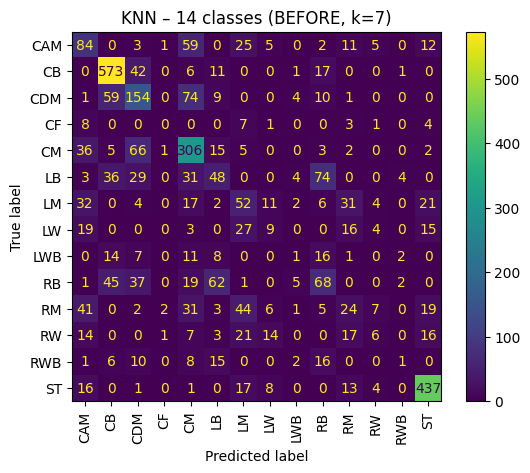

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def eval_clf(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    f1w = f1_score(y_test, pred, average="weighted")

    print("=" * 60)
    print(title)
    print(f"Accuracy: {acc:.3f}")
    print(f"F1 weighted: {f1w:.3f}")
    print(classification_report(y_test, pred))

    ConfusionMatrixDisplay.from_predictions(y_test, pred, xticks_rotation=90)
    plt.title(title)
    plt.grid(False)
    plt.show()

    return acc, f1w

knn_14_base = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

acc_14_base, f1_14_base = eval_clf(
    knn_14_base,
    X_train_14, y_train_14,
    X_test_14, y_test_14,
    "KNN – 14 classes (BEFORE, k=7)"
)

### 5. Чи є можливість покращити метрики змінивши параметри моделі та її параметри тренування? Або за допомогою зміни / трансформації даних? Проведіть оновлене тренування де ваші метрики покращаться.


In [ ]:
# Regression - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

y_train_log = np.log1p(y_train_reg)

rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train_reg, y_train_log)

y_pred_log = rf_reg.predict(X_test_reg)
y_pred_rf = np.expm1(y_pred_log)

mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("REGRESSION IMPROVED (RandomForest + log)")
print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R2: {r2_rf:.3f}")

print("""
Порівняння показало, що після використання RandomForest та логарифмічної трансформації
метрика R2 зросла, а помилка MAE та RMSE зменшилась.
Це свідчить про кращу здатність моделі враховувати нелінійні залежності.
""")

r2_train = r2_score(y_train_reg, np.expm1(rf_reg.predict(X_train_reg)))

REGRESSION IMPROVED (RandomForest + log)
MAE: 244784.284
RMSE: 1165656.543
R2: 0.978

Порівняння показало, що після використання RandomForest та логарифмічної трансформації
метрика R2 зросла, а помилка MAE та RMSE зменшилась.
Це свідчить про кращу здатність моделі враховувати нелінійні залежності.

Train R2: 0.997
Test R2: 0.978


Best k for 14 classes: 15
KNN – 14 classes (AFTER, k=15)
Accuracy: 0.556
F1 weighted: 0.527
              precision    recall  f1-score   support

         CAM       0.37      0.41      0.39       207
          CB       0.79      0.88      0.83       651
         CDM       0.46      0.51      0.48       312
          CF       0.00      0.00      0.00        24
          CM       0.52      0.76      0.62       441
          LB       0.32      0.26      0.29       229
          LM       0.28      0.27      0.28       182
          LW       0.16      0.08      0.10        93
         LWB       0.13      0.03      0.05        60
          RB       0.32      0.28      0.29       240
          RM       0.30      0.21      0.25       185
          RW       0.30      0.09      0.14        99
         RWB       0.00      0.00      0.00        59
          ST       0.81      0.89      0.85       497

    accuracy                           0.56      3279
   macro avg       0.34      0.33      0.3

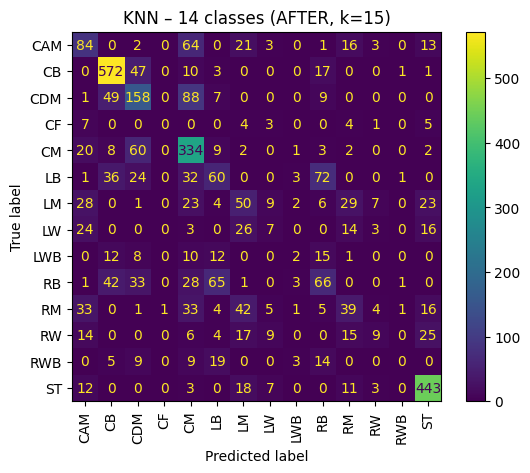

In [ ]:
from sklearn.model_selection import train_test_split

X_train_14_sub, X_val_14, y_train_14_sub, y_val_14 = train_test_split(
    X_train_14, y_train_14, test_size=0.2, random_state=42, stratify=y_train_14
)

best_k_14 = None
best_f1_14 = -1

for k in [3, 5, 7, 9, 11, 15]:
    m = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    m.fit(X_train_14_sub, y_train_14_sub)
    p = m.predict(X_val_14)
    cur = f1_score(y_val_14, p, average="weighted")

    if cur > best_f1_14:
        best_f1_14 = cur
        best_k_14 = k

print("Best k for 14 classes:", best_k_14)

knn_14_impr = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k_14))
])

acc_14_impr, f1_14_impr = eval_clf(
    knn_14_impr,
    X_train_14, y_train_14,
    X_test_14, y_test_14,
    f"KNN – 14 classes (AFTER, k={best_k_14})"
)

KNN – 3 groups (BEFORE, k=7)
Accuracy: 0.824
F1 weighted: 0.824
              precision    recall  f1-score   support

    Defender       0.88      0.89      0.89      1239
     Forward       0.81      0.75      0.78       713
  Midfielder       0.78      0.80      0.79      1327

    accuracy                           0.82      3279
   macro avg       0.82      0.81      0.82      3279
weighted avg       0.82      0.82      0.82      3279



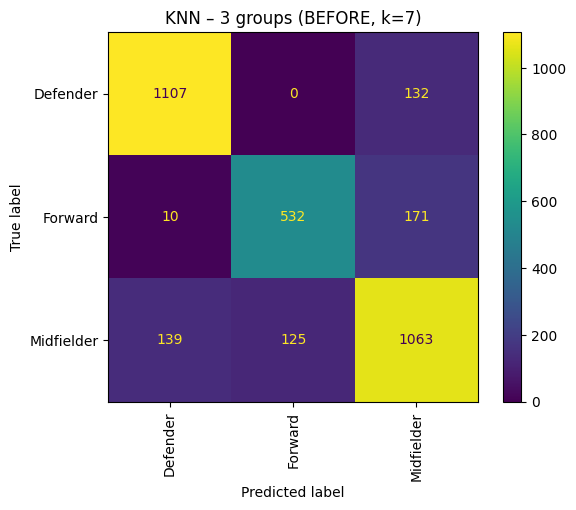

Best k for 3 groups: 15
KNN – 3 groups (AFTER, k=15)
Accuracy: 0.827
F1 weighted: 0.826
              precision    recall  f1-score   support

    Defender       0.89      0.89      0.89      1239
     Forward       0.84      0.72      0.78       713
  Midfielder       0.77      0.82      0.80      1327

    accuracy                           0.83      3279
   macro avg       0.83      0.81      0.82      3279
weighted avg       0.83      0.83      0.83      3279



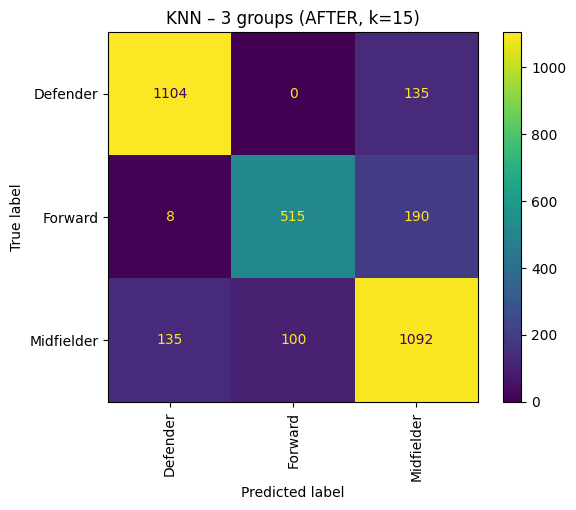

In [ ]:
position_map = {
    "CB": "Defender", "LB": "Defender", "RB": "Defender",
    "LWB": "Defender", "RWB": "Defender",

    "CM": "Midfielder", "CDM": "Midfielder", "CAM": "Midfielder",
    "LM": "Midfielder", "RM": "Midfielder",

    "ST": "Forward", "CF": "Forward",
    "LW": "Forward", "RW": "Forward"
}

df_model["position_group"] = df_model["player_position"].map(position_map)
y_group = df_model["position_group"]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X, y_group, test_size=0.2, random_state=42, stratify=y_group
)

knn_3_base = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

acc_3_base, f1_3_base = eval_clf(
    knn_3_base,
    X_train_3, y_train_3,
    X_test_3, y_test_3,
    "KNN – 3 groups (BEFORE, k=7)"
)

X_train_3_sub, X_val_3, y_train_3_sub, y_val_3 = train_test_split(
    X_train_3, y_train_3, test_size=0.2, random_state=42, stratify=y_train_3
)

best_k_3 = None
best_f1_3 = -1

for k in [3, 5, 7, 9, 11, 15]:
    m = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    m.fit(X_train_3_sub, y_train_3_sub)
    p = m.predict(X_val_3)
    cur = f1_score(y_val_3, p, average="weighted")

    if cur > best_f1_3:
        best_f1_3 = cur
        best_k_3 = k

print("Best k for 3 groups:", best_k_3)

knn_3_impr = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k_3))
])

acc_3_impr, f1_3_impr = eval_clf(
    knn_3_impr,
    X_train_3, y_train_3,
    X_test_3, y_test_3,
    f"KNN – 3 groups (AFTER, k={best_k_3})"
)

In [ ]:
print("=" * 60)
print("FINAL SUMMARY")

print("14 classes:")
print(f"  BEFORE → Acc: {acc_14_base:.3f}, F1: {f1_14_base:.3f}")
print(f"  AFTER  → Acc: {acc_14_impr:.3f}, F1: {f1_14_impr:.3f}")

print("3 groups:")
print(f"  BEFORE → Acc: {acc_3_base:.3f}, F1: {f1_3_base:.3f}")
print(f"  AFTER  → Acc: {acc_3_impr:.3f}, F1: {f1_3_impr:.3f}")

FINAL SUMMARY
14 classes:
  BEFORE → Acc: 0.538, F1: 0.511
  AFTER  → Acc: 0.556, F1: 0.527
3 groups:
  BEFORE → Acc: 0.824, F1: 0.824
  AFTER  → Acc: 0.827, F1: 0.826


### 6.Застосуйте вашу модель на одному окремому прикладі з датасету. Що вона вертає у відповідь , що значить даний повернений обєкт або тип?



In [ ]:
# Regression
one_x_reg = X_test_reg.iloc[[0]]
true_price = y_test_reg.iloc[0]

pred_price = rf_reg.predict(one_x_reg)
pred_price = np.expm1(pred_price)[0]

print("REGRESSION – single example")
print(f"True price: {true_price:,.0f}")
print(f"Predicted price: {pred_price:,.0f}")
print(f"Absolute error: {abs(true_price - pred_price):,.0f}")

# Classification
one_x_clf = X_test_3.iloc[[0]]
true_position = y_test_3.iloc[0]

pred_position = knn_3_impr.predict(one_x_clf)[0]

print("\nCLASSIFICATION – single example")
print(f"True position: {true_position}")
print(f"Predicted position: {pred_position}")
print(f"Correct prediction: {true_position == pred_position}")

REGRESSION – single example
True price: 925,000
Predicted price: 1,007,399
Absolute error: 82,399

CLASSIFICATION – single example
True position: ST
Predicted position: ST
Correct prediction: True
